In [65]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


In [66]:
 #set the size of our plots as they are a little small by default.
plt.rcParams["figure.figsize"] = (20,5)

In [70]:
df = pd.read_csv(r'/home/user/Data Science Projects/Taxi/Predicting-car-insurance-cost-throughcollision-risk-through-machine-learning-/LBD_New_York_collisions_and_weather_data.csv')
df.head()

,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
0,2,2013,1,1,01/01/2013,37.8,23.6,1011.9,10.0,6.1,8.9,19.0,39.9,33.1,0.0,999.9,0,381
1,3,2013,1,2,02/01/2013,27.1,10.5,1016.8,10.0,5.3,9.9,19.0,33.1,21.9,0.0,999.9,0,480
2,4,2013,1,3,03/01/2013,28.4,14.1,1020.6,10.0,3.7,8.0,15.0,32.0,24.1,0.0,999.9,0,549
3,5,2013,1,4,04/01/2013,33.4,18.6,1017.0,10.0,6.5,13.0,24.1,37.0,30.0,0.0,999.9,0,505
4,6,2013,1,5,05/01/2013,36.1,18.7,1020.6,10.0,6.6,12.0,21.0,42.1,32.0,0.0,999.9,0,389


In [71]:
df = df.sort_values(["year", "mo", "da"], ascending = (True, True, True)) # order the data by year, month, day in ascending order.
df.head() # check the data again by viewing the first 5 rows

,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
0,2,2013,1,1,01/01/2013,37.8,23.6,1011.9,10.0,6.1,8.9,19.0,39.9,33.1,0.0,999.9,0,381
1,3,2013,1,2,02/01/2013,27.1,10.5,1016.8,10.0,5.3,9.9,19.0,33.1,21.9,0.0,999.9,0,480
2,4,2013,1,3,03/01/2013,28.4,14.1,1020.6,10.0,3.7,8.0,15.0,32.0,24.1,0.0,999.9,0,549
3,5,2013,1,4,04/01/2013,33.4,18.6,1017.0,10.0,6.5,13.0,24.1,37.0,30.0,0.0,999.9,0,505
4,6,2013,1,5,05/01/2013,36.1,18.7,1020.6,10.0,6.6,12.0,21.0,42.1,32.0,0.0,999.9,0,389


In [78]:
total_collisions = df['NUM_COLLISIONS'].sum()
print("Total collisions before cleaning:", total_collisions)


Total collisions before cleaning: 1319249


Cleaning


In [84]:
# Filter rows where NUM_COLLISIONS is between 350 and 900
df_cleaned = df[(df["NUM_COLLISIONS"] > 350) & (df["NUM_COLLISIONS"] < 900)]

# Drop rows where all values are NaN, but ensure this is applied on the filtered DataFrame
df_cleaned = df_cleaned.dropna(how='all')

# Get descriptive statistics for the cleaned dataset
#print(df_cleaned.describe())

# Calculate total collisions in the cleaned dataset

df.dropna(subset=['important_column'], inplace=True)  # Drop rows with missing values in key columns
df['numeric_column'] = pd.to_numeric(df['numeric_column'], errors='coerce')  # Convert strings to numeric


total_collisions_post_clean = df_cleaned['NUM_COLLISIONS'].sum()
print("Total collisions before cleaning:", total_collisions)
print("Total total_collisions_post_clean:", total_collisions_post_clean)
difference = total_collisions - total_collisions_post_clean
print(difference)

KeyError: ['important_column']

Total collisions: 1319249


In [55]:
# Group the data by the day of the week and calculate the sum of collisions for each day
collisions_per_day = df.groupby('day')['NUM_COLLISIONS'].sum().reset_index()

# Rename the columns for clarity
collisions_per_day.columns = ['Day of the Week', 'Total Collisions']

# Sort the table by total collisions in descending order
collisions_per_day = collisions_per_day.sort_values(by='Total Collisions', ascending=False)

# Display the table
print(collisions_per_day)



   Day of the Week  Total Collisions
4                5            210926
3                4            199030
1                2            196191
2                3            194391
0                1            188797
5                6            175254
6                7            154660


Cleaning

,day,year,mo,da,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
count,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000
mean,4.000000,2015.500228,6.523962,15.726609,55.721086,41.120310,1107.412871,23.426654,50.871976,55.427704,384.628617,65.226974,47.875947,0.141031,920.095710,0.079416,602.121862
std,2.000457,1.707859,3.449207,8.800821,17.506851,19.298085,895.814069,118.917338,209.762963,208.768664,473.640573,18.156330,17.152164,0.353569,270.092092,0.270448,102.452173
min,1.000000,2013.000000,1.000000,1.000000,6.900000,-16.100000,992.100000,1.700000,0.000000,2.900000,14.000000,17.600000,-0.900000,0.000000,1.200000,0.000000,10.000000
25%,2.000000,2014.000000,4.000000,8.000000,41.550000,26.400000,1012.700000,8.500000,3.100000,7.000000,18.100000,50.000000,35.100000,0.000000,999.900000,0.000000,533.000000
50%,4.000000,2016.000000,7.000000,16.000000,56.900000,42.600000,1017.000000,9.800000,4.400000,8.900000,24.100000,66.900000,48.000000,0.000000,999.900000,0.000000,604.000000
75%,6.000000,2017.000000,10.000000,23.000000,71.900000,57.500000,1022.000000,10.000000,5.900000,11.100000,999.900000,82.000000,64.000000,0.080000,999.900000,0.000000,670.000000
max,7.000000,2018.000000,12.000000,31.000000,89.100000,74.800000,9999.900000,999.900000,999.900000,999.900000,999.900000,98.100000,82.900000,4.530000,999.900000,1.000000,1161.000000


Descriptive analysis

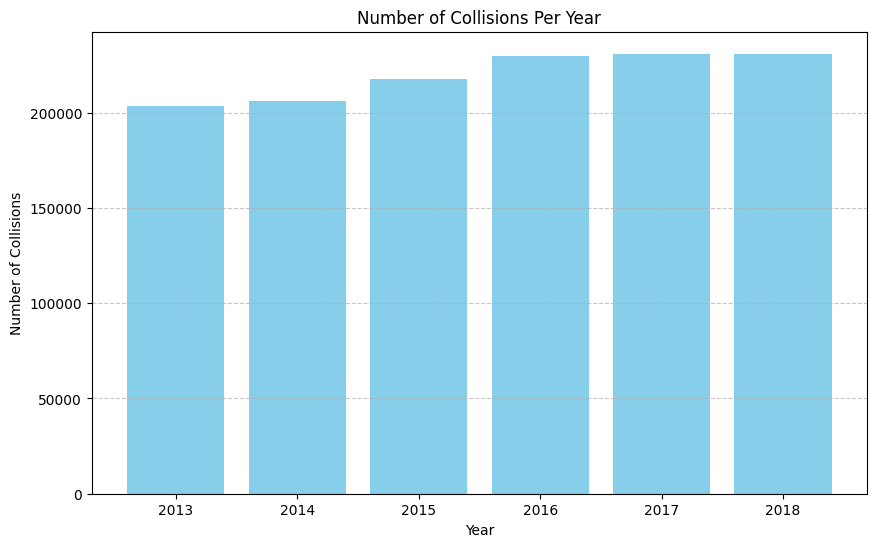

In [37]:
# Grouping by 'year' and summing 'NUM_COLLISIONS' for each year
collisions_per_year = df_cleaned.groupby('year')['NUM_COLLISIONS'].sum()

# Convert the series to a DataFrame for plotting
collisions_per_year_df = collisions_per_year.reset_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(collisions_per_year_df['year'], collisions_per_year_df['NUM_COLLISIONS'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Collisions')
plt.title('Number of Collisions Per Year')
plt.xticks(collisions_per_year_df['year'])  # Ensure all years are displayed on the x-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Narrative - ok clearly collisions are increasing, year on year

In [38]:
# Group the data by the day of the week and calculate the sum of collisions for each day
collisions_per_day = df.groupby('day')['NUM_COLLISIONS'].sum().reset_index()

# Rename the columns for clarity
collisions_per_day.columns = ['Day of the Week', 'Total Collisions']

# Sort the table by total collisions in descending order
collisions_per_day = collisions_per_day.sort_values(by='Total Collisions', ascending=False)

# Display the table
#print(collisions_per_day)

##Interesting - Friday as the most collisions, with Sunday the least - rush hour, commuting
## so what's the connection between Friday and Sunday. Sunday is a quieter day, Friday busier. Don't have a time of day so can't look at this in more detail.
##is there time data available?


#Correlation between weather? Rainfall on a particular day? or by month?

In [44]:
# Interesting - let's look more closely at the data for Friday, across the years.

from sklearn.linear_model import LinearRegression

# Filter the data for Friday and Sunday
friday_sunday_data = collisions_per_day_per_year[(collisions_per_day_per_year['day_mapped'] == 'Friday') | (collisions_per_day_per_year['day_mapped'] == 'Sunday')]

# Create a scatterplot
plt.scatter(friday_sunday_data['year'], friday_sunday_data['NUM_COLLISIONS'], c=friday_sunday_data['day_mapped'].map({'Friday': 'blue', 'Sunday': 'red'}))

# Fit a linear regression model
model = LinearRegression()
model.fit(friday_sunday_data[['year']], friday_sunday_data['NUM_COLLISIONS'])

# Predict values using the model
predictions = model.predict(friday_sunday_data[['year']])

# Plot the line of best fit
plt.plot(friday_sunday_data['year'], predictions, color='black', linestyle='-')

# Create a custom legend
#plt.legend(['Line of Best Fit', 'Friday', 'Sunday'], loc='upper left')

plt.xlabel('Year')
plt.ylabel('Number of Collisions')
plt.title('Scatterplot of Collisions on Friday and Sunday with Line of Best Fit')
plt.grid(True)
plt.show()

## Narrative - interesting - the number of collisions on Friday increased between 2015 and 2016

NameError: name 'collisions_per_day_per_year' is not defined